In [681]:
import pandas as pd
panificio=pd.read_csv("/kaggle/input/panificiodefi/panificidefinitivosperiamo (4).csv",sep=';',)
panificio
panificio=pd.DataFrame(panificio)
panificio
panificio=panificio.drop(["Unnamed: 0"],axis=1)
#elimino dati conteneti il "." nel nome articolo
panificio = panificio.drop(panificio[panificio['article']=='.'].index)
#sostituisco alcuni dati anomali
panificio.loc[panificio['article'].str.startswith('PLAT'), 'article'] = 'PLAT'
panificio
panificio['Quantity'].mean()
panificio

date   time  ticket_number               article  Quantity  \
0       02/01/2021  08:38       150040.0              BAGUETTE       1.0   
1       02/01/2021  08:38       150040.0      PAIN AU CHOCOLAT       3.0   
2       02/01/2021  09:14       150041.0      PAIN AU CHOCOLAT       2.0   
3       02/01/2021  09:14       150041.0                  PAIN       1.0   
4       02/01/2021  09:25       150042.0  TRADITIONAL BAGUETTE       5.0   
...            ...    ...            ...                   ...       ...   
234000  30/09/2022  18:52       288911.0                 COUPE       1.0   
234001  30/09/2022  18:52       288911.0            BOULE 200G       1.0   
234002  30/09/2022  18:52       288911.0                 COUPE       2.0   
234003  30/09/2022  18:55       288912.0  TRADITIONAL BAGUETTE       1.0   
234004  30/09/2022  18:56       288913.0  TRADITIONAL BAGUETTE       1.0   

       unit_price  
0          0,90 €  
1          1,20 €  
2          1,20 €  
3          1,15 €  
4          1,20 €  
...           ...  
234000     0,15 €  
234001     1,20 €  
234002     0,15 €  
234003     1,30 €  
234004     1,30 €  

[234000 rows x 6 columns]

In [682]:
sommatoria = panificio.groupby('article')['Quantity'].sum()
sommatoria= sommatoria.sort_values(ascending=False)
sommatoria=sommatoria.astype(int)
#frequenze per ogni tipo di quantità venduta rispetto all'articolo, cos' da vedere anche le perdite per ogni articolo
frequenze = panificio.groupby(['article','Quantity']).size()

frequenze=frequenze.sort_values(ascending=False)
freq=pd.DataFrame(frequenze)
sommatoria_totale = freq.sum()
freq

0
article              Quantity       
TRADITIONAL BAGUETTE  1.0      36349
                      2.0      20077
COUPE                 1.0      18087
BAGUETTE              1.0      11221
BANETTE               1.0       9922
...                              ...
PAIN CHOCO AMANDES    10.0         1
                      6.0          1
COMPLET              -3.0          1
                     -2.0          1
VIK BREAD             11.0         1

[837 rows x 1 columns]

In [683]:
sommatoria
frequenze
freq


0
article              Quantity       
TRADITIONAL BAGUETTE  1.0      36349
                      2.0      20077
COUPE                 1.0      18087
BAGUETTE              1.0      11221
BANETTE               1.0       9922
...                              ...
PAIN CHOCO AMANDES    10.0         1
                      6.0          1
COMPLET              -3.0          1
                     -2.0          1
VIK BREAD             11.0         1

[837 rows x 1 columns]

In [684]:
import matplotlib as plt
#grafico pivot con le quantità vendute per articolo per ogni singolo giorno
graf = panificio.pivot_table("Quantity",index="date",columns="article",aggfunc=sum)
graf


article     12 MACARON  ARMORICAIN  ARTICLE 295  BAGUETTE  BAGUETTE APERO  \
date                                                                        
01/02/2021         NaN         NaN          NaN      15.0             NaN   
01/02/2022         NaN         NaN          NaN      25.0             NaN   
01/03/2021         NaN         NaN          NaN      36.0             NaN   
01/03/2022         NaN         NaN          NaN      28.0             NaN   
01/04/2021         NaN         NaN          NaN      29.0             NaN   
...                ...         ...          ...       ...             ...   
31/07/2022         2.0         NaN          NaN      70.0             NaN   
31/08/2021         NaN         NaN          NaN      35.0             NaN   
31/08/2022         NaN         NaN          NaN      16.0             NaN   
31/10/2021         NaN         NaN          NaN      55.0             NaN   
31/12/2021         NaN         NaN          NaN      49.0             NaN   

article     BAGUETTE GRAINE  BANETTE  BANETTINE  BOISSON 33CL  BOTTEREAU  ...  \
date                                                                      ...   
01/02/2021              NaN     20.0        5.0           1.0        NaN  ...   
01/02/2022              NaN     23.0        1.0           NaN        NaN  ...   
01/03/2021              NaN     30.0        5.0           1.0        NaN  ...   
01/03/2022              NaN     30.0        4.0           4.0       16.0  ...   
01/04/2021              NaN     24.0        4.0           3.0        NaN  ...   
...                     ...      ...        ...           ...        ...  ...   
31/07/2022              8.0     84.0        7.0           8.0        NaN  ...   
31/08/2021              NaN     41.0        6.0           4.0        NaN  ...   
31/08/2022              NaN     29.0        5.0           3.0        NaN  ...   
31/10/2021             10.0     91.0        6.0           1.0        NaN  ...   
31/12/2021             10.0     41.0        6.0           2.0        NaN  ...   

article     THE  TRADITIONAL BAGUETTE  TRAITEUR  TRIANGLES  TROIS CHOCOLAT  \
date                                                                         
01/02/2021  NaN                  72.0       NaN        NaN             NaN   
01/02/2022  NaN                  96.0       6.0        NaN             NaN   
01/03/2021  NaN                 201.0       NaN        NaN             NaN   
01/03/2022  NaN                 148.0       9.0        NaN             NaN   
01/04/2021  NaN                 113.0       NaN        NaN             NaN   
...         ...                   ...       ...        ...             ...   
31/07/2022  NaN                 544.0       NaN        NaN             NaN   
31/08/2021  NaN                 151.0       3.0        NaN             NaN   
31/08/2022  NaN                 155.0       NaN        NaN             NaN   
31/10/2021  NaN                 369.0       3.0        NaN             NaN   
31/12/2021  NaN                 251.0      20.0        NaN             NaN   

article     TROPEZIENNE  TROPEZIENNE FRAMBOISE  TULIPE  VIENNOISE  VIK BREAD  
date                                                                          
01/02/2021          NaN                    NaN     NaN        NaN        NaN  
01/02/2022          NaN                    NaN     NaN        NaN        NaN  
01/03/2021          NaN                    NaN     NaN        NaN        NaN  
01/03/2022          NaN                    NaN     NaN        NaN        NaN  
01/04/2021          3.0                    4.0     NaN        NaN        NaN  
...                 ...                    ...     ...        ...        ...  
31/07/2022          NaN                    NaN     NaN        NaN       15.0  
31/08/2021          NaN                    NaN     NaN        NaN        NaN  
31/08/2022          NaN                    NaN     NaN        NaN        NaN  
31/10/2021          5.0                    1.0     NaN      

In [685]:
import matplotlib as plt
grouped = panificio.groupby(["article", "time"]).sum()
graf
import plotly.express as px
#grafico contenente tutte le unità prezzo per articolo
fig = px.scatter(panificio, x='unit_price', y='article', width=1500, height=1600)
fig


In [686]:
#funzione per calcolare la quatità venduta per singolo articolo, in un anno,mese,giorno e ora specifica, basta
#cambiare il valore delle variabili e di conseguenza avere come risultati grafici e valori di output diversi
#questo permette anche di poter confrontare i vari risultati
panificio['date']=pd.to_datetime(panificio['date'])
panificio['time'] = pd.to_datetime(panificio['time'])

panificio['mese'] = panificio['date'].dt.month
panificio['anno'] = panificio['date'].dt.year
panificio['giorno'] = panificio['date'].dt.day
panificio['ora'] = panificio['time'].dt.hour


# Filtra il dataframe per anno,mese,giorno,ora specifica
mese_specifico = 4
mese_specifico_2= 5
anno_specifico = 2021
anno_specifico_2 = 2022
giorno_specifico = 30
giorno_specifico_2 = 3
ora_specifica= 12
ora_specifica_2= 20
panificio_mese_giorno_anno_specifico = panificio[(panificio['mese'] == mese_specifico) & (panificio['anno'] == anno_specifico) & (panificio['giorno']==giorno_specifico) & (panificio['ora'] == ora_specifica)]

# Raggruppa i dati per articolo e somma le quantità vendute per ogni articolo
panificio_articolo_vendite = panificio_mese_giorno_anno_specifico.groupby('article')['Quantity'].sum()

panificio_articolo_vendite 
panificio_articolo_vendite.sort_values(ascending=False).head(6)




article
TRADITIONAL BAGUETTE    17.0
COUPE                    8.0
BAGUETTE                 4.0
BANETTE                  4.0
CEREAL BAGUETTE          3.0
PAIN AU CHOCOLAT         3.0
Name: Quantity, dtype: float64

In [687]:
#calcolo totale quantià vendute nel 2021
panificio_mese_giorno_anno_specifico_2021 = panificio[ (panificio['anno'] == anno_specifico)]
panificio_articolo_vendite_2021 = panificio_mese_giorno_anno_specifico_2021.groupby('article')['Quantity'].sum()
panificio_articolo_vendite_2021 
panificio_articolo_vendite_2021=panificio_articolo_vendite_2021.sort_values(ascending=False).head(10)
totale_2021= panificio_articolo_vendite_2021.sum()
totale_2021
panificio_articolo_vendite_2021


article
TRADITIONAL BAGUETTE    65619.0
CROISSANT               16398.0
PAIN AU CHOCOLAT        13829.0
COUPE                   13666.0
BANETTE                 13003.0
BAGUETTE                12757.0
CEREAL BAGUETTE          4670.0
SPECIAL BREAD            3078.0
FORMULE SANDWICH         2845.0
TARTELETTE               2837.0
Name: Quantity, dtype: float64

In [688]:
#calcolo totale quantià vendute nel 2022
panificio_mese_giorno_anno_specifico_2022 = panificio[ (panificio['anno'] == anno_specifico_2)]
panificio_articolo_vendite_2022 = panificio_mese_giorno_anno_specifico_2022.groupby('article')['Quantity'].sum()
panificio_articolo_vendite_2022 
panificio_articolo_vendite_2022 =panificio_articolo_vendite_2022.sort_values(ascending=False).head(10)
totale_2022= panificio_articolo_vendite_2022.sum()
totale_2022
panificio_articolo_vendite_2022
panificio_articolo_vendite_2022_2021=panificio_articolo_vendite_2022+panificio_articolo_vendite_2021
panificio_articolo_vendite_2022


article
TRADITIONAL BAGUETTE    51844.0
CROISSANT               13256.0
PAIN AU CHOCOLAT        11407.0
COUPE                    9839.0
BANETTE                  9729.0
BAGUETTE                 9296.0
CEREAL BAGUETTE          2757.0
SPECIAL BREAD            2378.0
FORMULE SANDWICH         2336.0
TARTELETTE               2183.0
Name: Quantity, dtype: float64

In [689]:
panificio_articolo_vendite_2022_2021

article
TRADITIONAL BAGUETTE    117463.0
CROISSANT                29654.0
PAIN AU CHOCOLAT         25236.0
COUPE                    23505.0
BANETTE                  22732.0
BAGUETTE                 22053.0
CEREAL BAGUETTE           7427.0
SPECIAL BREAD             5456.0
FORMULE SANDWICH          5181.0
TARTELETTE                5020.0
Name: Quantity, dtype: float64

In [690]:
totale_2021

148702.0

In [691]:
totale_2022

115025.0

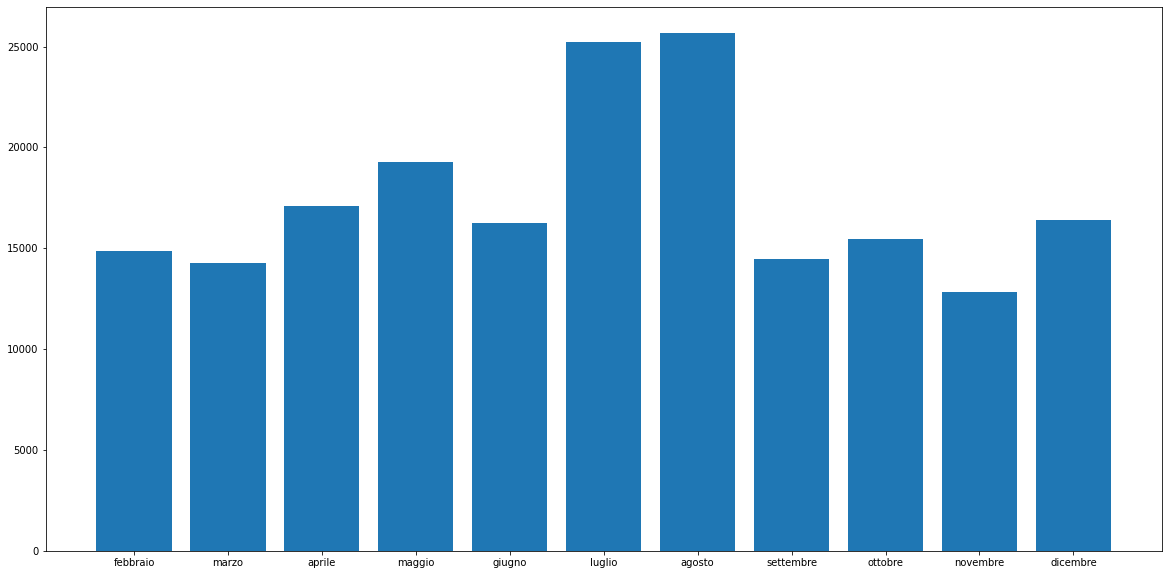

In [692]:
import matplotlib.pyplot as plt
#grafico che confronta le quantità vendute per tutti i mesi del 2021
panificio_febbraio_2021 = panificio.loc[(panificio['date'].dt.year == 2021) & (panificio['mese'] == 2)]
panificio_marzo_2021 = panificio.loc[(panificio['date'].dt.year == 2021) & (panificio['mese'] == 3)]
panificio_aprile_2021 = panificio.loc[(panificio['date'].dt.year == 2021) & (panificio['mese'] == 4)]
panificio_maggio_2021 = panificio.loc[(panificio['date'].dt.year == 2021) & (panificio['mese'] == 5)]
panificio_giugno_2021 = panificio.loc[(panificio['date'].dt.year == 2021) & (panificio['mese'] == 6)]
panificio_luglio_2021 = panificio.loc[(panificio['date'].dt.year == 2021) & (panificio['mese'] == 7)]
panificio_agosto_2021 = panificio.loc[(panificio['date'].dt.year == 2021) & (panificio['mese'] == 8)]
panificio_settembre_2021 = panificio.loc[(panificio['date'].dt.year == 2021) & (panificio['mese'] == 9)]
panificio_ottobre_2021 = panificio.loc[(panificio['date'].dt.year == 2021) & (panificio['mese'] == 10)]
panificio_novembre_2021 = panificio.loc[(panificio['date'].dt.year == 2021) & (panificio['mese'] == 11)]
panificio_dicembre_2021 = panificio.loc[(panificio['date'].dt.year == 2021) & (panificio['mese'] == 12)]


fig = plt.figure(figsize=(20, 10))
plt.bar(['febbraio','marzo','aprile','maggio','giugno','luglio','agosto','settembre','ottobre','novembre','dicembre'], [panificio_febbraio_2021['Quantity'].sum(),panificio_marzo_2021['Quantity'].sum(),panificio_aprile_2021['Quantity'].sum(),panificio_maggio_2021['Quantity'].sum(),panificio_giugno_2021['Quantity'].sum(),panificio_luglio_2021['Quantity'].sum(),panificio_agosto_2021['Quantity'].sum(),panificio_settembre_2021['Quantity'].sum(),panificio_ottobre_2021['Quantity'].sum(),panificio_novembre_2021['Quantity'].sum(),panificio_dicembre_2021['Quantity'].sum()])
plt.show()

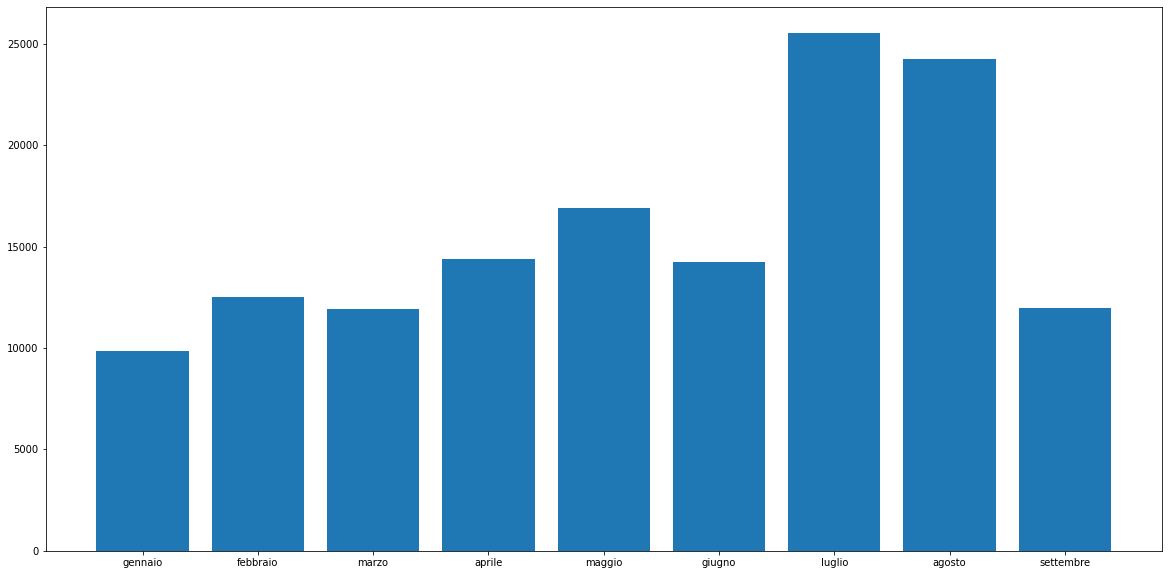

In [693]:
#grafico che confronta le quantità vendute per tutti i mesi del 2022
panificio_gennaio_2022 = panificio.loc[(panificio['date'].dt.year == 2022) & (panificio['mese'] == 1)]
panificio_febbraio_2022 = panificio.loc[(panificio['date'].dt.year == 2022) & (panificio['mese'] == 2)]
panificio_marzo_2022 = panificio.loc[(panificio['date'].dt.year == 2022) & (panificio['mese'] == 3)]
panificio_aprile_2022 = panificio.loc[(panificio['date'].dt.year == 2022) & (panificio['mese'] == 4)]
panificio_maggio_2022 = panificio.loc[(panificio['date'].dt.year == 2022) & (panificio['mese'] == 5)]
panificio_giugno_2022 = panificio.loc[(panificio['date'].dt.year == 2022) & (panificio['mese'] == 6)]
panificio_luglio_2022 = panificio.loc[(panificio['date'].dt.year == 2022) & (panificio['mese'] == 7)]
panificio_agosto_2022 = panificio.loc[(panificio['date'].dt.year == 2022) & (panificio['mese'] == 8)]
panificio_settembre_2022 = panificio.loc[(panificio['date'].dt.year == 2022) & (panificio['mese'] == 9)]
fig = plt.figure(figsize=(20, 10))
plt.bar(['gennaio','febbraio','marzo','aprile','maggio','giugno','luglio','agosto','settembre'], [panificio_gennaio_2022['Quantity'].sum(),panificio_febbraio_2022['Quantity'].sum(),panificio_marzo_2022['Quantity'].sum(),panificio_aprile_2022['Quantity'].sum(),panificio_maggio_2022['Quantity'].sum(),panificio_giugno_2022['Quantity'].sum(),panificio_luglio_2022['Quantity'].sum(),panificio_agosto_2022['Quantity'].sum(),panificio_settembre_2022['Quantity'].sum()])
plt.show()

In [694]:
#calcolo il ricavato totale 
somma_quantità = panificio.groupby(['article'])['Quantity'].sum()
panificio['unit_price_2'] = panificio['unit_price'].str.replace(',','.').str.replace('€','').astype(float)

ricavo_totale = somma_quantità * panificio.groupby(['article'])['unit_price_2'].first()
ricavo_totale.sort_values(ascending=False).head(10)


article
TRADITIONAL BAGUETTE    140955.6
FORMULE SANDWICH         33676.5
CROISSANT                32619.4
PAIN AU CHOCOLAT         30283.2
BANETTE                  23868.6
BAGUETTE                 19847.7
SPECIAL BREAD            13094.4
SANDWICH COMPLET         12996.0
GRAND FAR BRETON         10402.0
TARTELETTE               10040.0
dtype: float64

In [695]:
#calcolo il ricavato totale nel 2022
ricavo_2022=panificio_articolo_vendite_2022 * panificio.groupby(['article'])['unit_price_2'].first()
ricavo_2022.sort_values(ascending=False).head(10)


article
TRADITIONAL BAGUETTE    62212.80
FORMULE SANDWICH        15184.00
CROISSANT               14581.60
PAIN AU CHOCOLAT        13688.40
BANETTE                 10215.45
BAGUETTE                 8366.40
SPECIAL BREAD            5707.20
TARTELETTE               4366.00
CEREAL BAGUETTE          3446.25
COUPE                    1475.85
dtype: float64

In [696]:
#calcolo il ricavato totale nel 2021
ricavo_2021=panificio_articolo_vendite_2021 * panificio.groupby(['article'])['unit_price_2'].first()
ricavo_2021.sort_values(ascending=False).head(10)


article
TRADITIONAL BAGUETTE    78742.80
FORMULE SANDWICH        18492.50
CROISSANT               18037.80
PAIN AU CHOCOLAT        16594.80
BANETTE                 13653.15
BAGUETTE                11481.30
SPECIAL BREAD            7387.20
CEREAL BAGUETTE          5837.50
TARTELETTE               5674.00
COUPE                    2049.90
dtype: float64

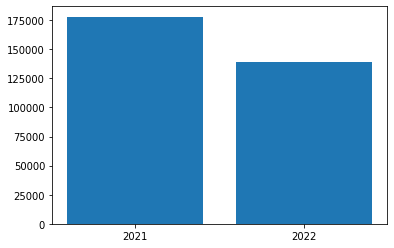

In [697]:
import matplotlib.pyplot as plt
#confronto il ricavo dei due anni
plt.bar(['2021','2022'], [ricavo_2021.sum(), ricavo_2022.sum()])
plt.show()


In [698]:
ricavo_2021.sum()

177950.95

In [699]:
ricavo_2022.sum()

139243.95

In [700]:
#calcolo il ricavo di aprile 2021 e maggio 2021
panificio_mese_anno_specifico = panificio[(panificio['mese'] == mese_specifico) & (panificio['anno'] == anno_specifico)]
panificio_mese_anno_specifico_2 = panificio[(panificio['mese'] == mese_specifico_2) & (panificio['anno'] == anno_specifico)]
panificio_mese_anno_specifico = panificio_mese_anno_specifico.groupby('article')['Quantity'].sum()
panificio_mese_anno_specifico_2 = panificio_mese_anno_specifico_2.groupby('article')['Quantity'].sum()
ricavo_mese = panificio_mese_anno_specifico*panificio.groupby(['article'])['unit_price_2'].first()
ricavo_mese_2 = panificio_mese_anno_specifico_2*panificio.groupby(['article'])['unit_price_2'].first()

In [701]:
#ordino il ricavo dei due mesi
ricavo_mese.sort_values(ascending=False).head(10)

article
TRADITIONAL BAGUETTE    6788.40
FORMULE SANDWICH        1690.00
CROISSANT               1410.20
PAIN AU CHOCOLAT        1374.00
BANETTE                 1147.65
BAGUETTE                 927.00
SANDWICH COMPLET         697.50
SPECIAL BREAD            619.20
CEREAL BAGUETTE          568.75
CAMPAGNE                 435.60
dtype: float64

In [702]:
ricavo_mese_2.sort_values(ascending=False).head(10)

article
TRADITIONAL BAGUETTE    7530.0
CROISSANT               1827.1
FORMULE SANDWICH        1716.0
PAIN AU CHOCOLAT        1662.0
BANETTE                 1218.0
BAGUETTE                1081.8
SPECIAL BREAD            696.0
GRAND FAR BRETON         644.0
GD KOUIGN AMANN          600.0
TARTELETTE               582.0
dtype: float64

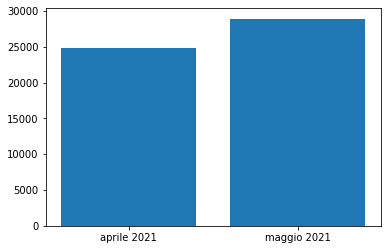

In [703]:
#confronto il ricavo dei due mesi
plt.bar(['aprile 2021','maggio 2021'], [ricavo_mese.sum(), ricavo_mese_2.sum()])
plt.show()

In [704]:
#quantità vendute aprile 2021
panificio_mese_anno_specifico.sort_values(ascending=False).head(10)

article
TRADITIONAL BAGUETTE    5657.0
CROISSANT               1282.0
PAIN AU CHOCOLAT        1145.0
COUPE                   1109.0
BANETTE                 1093.0
BAGUETTE                1030.0
CEREAL BAGUETTE          455.0
FORMULE SANDWICH         260.0
SPECIAL BREAD            258.0
CAMPAGNE                 242.0
Name: Quantity, dtype: float64

In [705]:
#quantità vendute maggio 2021
panificio_mese_anno_specifico_2.sort_values(ascending=False).head(10)

article
TRADITIONAL BAGUETTE    6275.0
CROISSANT               1661.0
PAIN AU CHOCOLAT        1385.0
COUPE                   1232.0
BAGUETTE                1202.0
BANETTE                 1160.0
CEREAL BAGUETTE          392.0
TARTELETTE               291.0
SPECIAL BREAD            290.0
FORMULE SANDWICH         264.0
Name: Quantity, dtype: float64

In [706]:
#importo le librerie per calcolare e fare la retta di regressione
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


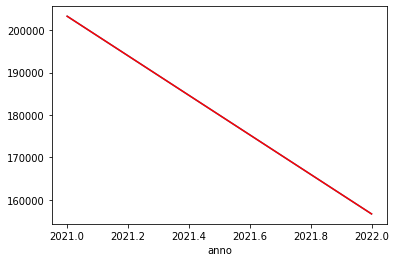

In [707]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#sommmo tutte le quantità vendute per anno e calcolo la regressione rispetto ai due anni 2021 e 2022
panificio_agg = panificio.groupby(['anno'])['Quantity'].sum()

# Crea il grafico di linea della quantità totale venduta rispetto all'anno
panificio_agg.plot(kind='line')

# Calcola i coefficienti di regressione utilizzando polyfit
coefficients = np.polyfit(panificio_agg.index, panificio_agg, deg=1)

# Traccia la linea di regressione sul grafico
plt.plot(panificio_agg.index, coefficients[0] * panificio_agg.index + coefficients[1], '-', color='red')

# Mostra il grafico
plt.show()



In [708]:
#calcolo con i coefficenti di regressione la quantità venduta nel 2023
predicted_sales = coefficients[0] * 2023 + coefficients[1]
print(predicted_sales)


110025.9999999851
